In [47]:
from pathlib import Path
from typing import List
import gzip
import numpy as np
import pandas as pd

import torch.utils.data as Data 
import torch
import matplotlib.pyplot as plt
from torch import nn ,optim
from nilearn.image import smooth_img
import plotly.graph_objs as go

In [100]:
data_participants_dir='E:/Data/participants1.tsv'#获取全部实验者的数据
data_participants_tsv=pd.read_csv(data_participants_dir,sep='\t')
data_NoNaN=data_participants_tsv.dropna(axis=0,how='any')#去除NAN无效数据
data_edu=data_NoNaN.education_category
data_NoNaN

,participant_id,age,sex,BMI,handedness,education_category,religious_now,raven_score,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C
0,sub-0001,26.25,F,24.0,right,applied,no,29.0,35,44,37,39,48
1,sub-0002,21.00,F,23.0,right,academic,no,27.0,27,53,40,48,34
2,sub-0003,23.00,M,22.0,right,academic,no,22.0,35,40,43,37,38
3,sub-0004,23.50,F,22.0,right,applied,no,21.0,29,47,41,48,41
4,sub-0005,21.75,M,19.0,ambidextrous,applied,no,28.0,26,35,40,38,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,sub-0212,20.50,F,29.0,ambidextrous,applied,no,19.0,24,44,29,47,41
212,sub-0213,19.75,M,26.0,right,applied,no,18.0,20,50,40,46,39
213,sub-0214,19.50,M,19.0,right,applied,no,19.0,24,50,37,46,56
214,sub-0215,18.25,F,20.0,right,applied,yes,24.0,33,42,42,41,48


In [94]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [95]:
count=[0,0]
for i in data_edu:
    if i=='applied':
        count[0]+=1
    
    elif i=='academic':
        count[1]+=1
count

[120, 104]

In [96]:
labels=['applied','academic']

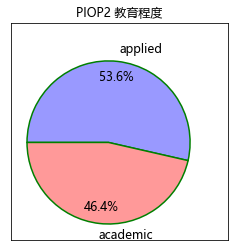

In [98]:
colors=['#9999ff','#ff9999']
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 将横、纵坐标轴标准化处理，保证饼图是一个正圆，否则为椭圆
plt.axes(aspect='equal')

# 控制x轴和y轴的范围
plt.xlim(0,4)
plt.ylim(0,4)
plt.pie(x = count, # 绘图数据
        labels=labels, # 添加教育水平标签
        colors=colors, # 设置饼图的自定义填充色
        autopct='%.1f%%', # 设置百分比的格式，这里保留一位小数
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 1.15, # 设置教育水平标签与圆心的距离
        startangle = 180, # 设置饼图的初始角度
        radius = 1.5, # 设置饼图的半径
        counterclock = False, # 是否逆时针，这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'k'}, # 设置文本标签的属性值
        center = (1.8,1.8), # 设置饼图的原点
        frame = 2)# 是否显示饼图的图框，这里设置显示

# 删除x轴和y轴的刻度
plt.xticks(())
plt.yticks(())
# 添加图标题
plt.title('PIOP2 教育程度')

# 显示图形
plt.show()